# Yorùbá Gender Recognition from Speech using Attention-based BiLSTM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import preprocessing


In [ ]:
from numpy.random import seed
seed(2)
from tensorflow import set_random_seed
set_random_seed(2)

# Load Data

In [ ]:
from google.colab import drive
drive.mount('drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [ ]:
df = pd.read_csv('drive/My Drive/dev/yorubafeatures.csv')
df = df.sample(len(df),random_state=2)
df.head()

gender  speaker  zcr_mean  ...  chroma_11_std  chroma_12_std  chroma_std_std
3361  female        5  0.055049  ...       0.007933       0.000589        0.004344
724     male       31  0.042334  ...       0.004231       0.000462        0.004560
2751  female       16  0.059723  ...       0.003216       0.000382        0.005709
208     male       20  0.047445  ...       0.013834       0.002295        0.003829
2710  female        8  0.041689  ...       0.013726       0.000976        0.004572

[5 rows x 70 columns]

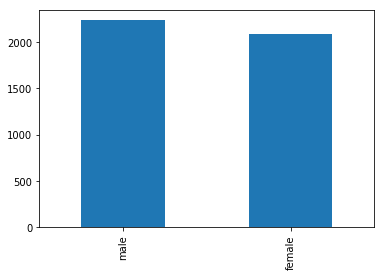

In [ ]:
df.gender.value_counts().plot(kind='bar')
plt.show()

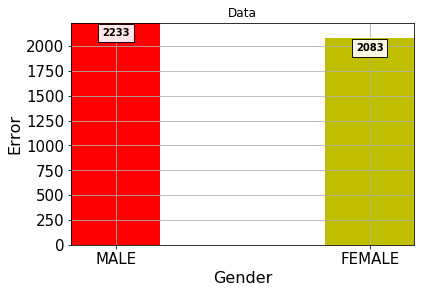

In [ ]:
men_means = df.gender.value_counts().values
# women_means, women_std = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)
ind = np.arange(len(df.gender.value_counts()))  # the x locations for the groups
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind , men_means, width,
                label='Males',color='rybg')
# rects2 = ax.bar(ind + width/2, women_means, width,
#                 label='Females',color='r')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Error',fontdict={'family':'sans','weight':'normal','size': 16})
# ax.set_title('Scores by group and gender',fontdict={'family':'sans','color':  'black','weight':'normal','size': 16})
ax.set_xticks(ind)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
ax.set_xticklabels(('MALE', 'FEMALE'),
                   fontdict={'family':'sans','weight':'normal','size': 15})
ax.set_xlabel('Gender',fontdict={'family':'sans','weight':'normal','size': 16})

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -5),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    weight='bold', 
                    ha='center',bbox=dict(facecolor='white', alpha=0.9),
                     va='top',clip_on=True)


autolabel(rects1, "left")


fig.tight_layout()
plt.grid()
plt.autoscale(tight=True)
plt.title('Data')
# plt.legend(prop={'family':'sans','weight':'normal','size': 14})
# plt.savefig('rmse.eps') # save eps, it is a graphic vector
plt.savefig('rmse.png',dpi=300) # save png
plt.show()

# Encode Labels

In [ ]:
# Integer Label Encoding
lencoder = preprocessing.LabelEncoder()
y = lencoder.fit_transform(df['gender'].values)

# Save integer encoding to DataFrame
df[df.columns[0]] = y

# Normalize Data

In [ ]:
from sklearn.preprocessing import StandardScaler
# Normalize data
normalise = StandardScaler().fit_transform(df[df.columns[2:]]) 

df[df.columns[2:]] = normalise

# Split Data

In [ ]:
train = df.sample(frac=0.9,random_state= 1)
test = df.drop(train.index)
val = test.sample(frac=0.5,random_state= 1)
test = test.drop(val.index)

x_train = train[train.columns[2:]]
x_test = test[test.columns[2:]]
x_val = val[val.columns[2:]]

y_train = train['gender']
y_test = test['gender']
y_val = val['gender']

y_train_hot = keras.utils.to_categorical(y_train)
y_test_hot =  keras.utils.to_categorical(y_test)
y_val_hot =  keras.utils.to_categorical(y_val)

print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)
print('y_val: ',y_val.shape)
print('y_train_hot: ',y_train_hot.shape)
print('y_test_hot: ',y_test_hot.shape)
print('y_val_hot: ',y_val_hot.shape)

y_train:  (3884,)
y_test:  (216,)
y_val:  (216,)
y_train_hot:  (3884, 2)
y_test_hot:  (216, 2)
y_val_hot:  (216, 2)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[2:]],y, random_state=2,stratify=y, test_size=0.1)
Y_train_hot = keras.utils.to_categorical(Y_train)
Y_test_hot =  keras.utils.to_categorical(Y_test)

print('X train',X_train.shape)
print('Y train',Y_train.shape)
print('Y train hot',Y_train_hot.shape)
print('X test',X_test.shape)
print('Y test',Y_test.shape)
print('Y test hot',Y_test_hot.shape)

X train (3884, 68)
Y train (3884,)
Y train hot (3884, 2)
X test (432, 68)
Y test (432,)
Y test hot (432, 2)


# Train Model

# MLP

In [ ]:
NUM_EPOCHS = 100
BATCH_SIZE = 128
num_classes = df.gender.unique().shape[0]

In [ ]:
model_mlp = keras.models.Sequential([keras.layers.Dense(128, input_shape=(x_train.shape[1],)),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Activation(activation='relu'),
    keras.layers.Dense(128),
    keras.layers.Dropout(rate=0.5), 
    keras.layers.Activation(activation='relu'),
    keras.layers.Dense(num_classes, activation='sigmoid')
])
model_mlp.summary()
model_mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
reduce_lr1 = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=100, verbose=1,min_lr=0.00001)
# fit network
history = model_mlp.fit(x_train,encoder.transform(y_train.reshape(-1, 1)),
                    epochs=NUM_EPOCHS, 
                    verbose=0,
                    batch_size=BATCH_SIZE,
                    validation_data=(x_test,encoder.transform(y_test.reshape(-1, 1))),
                    callbacks=[keras.callbacks.CSVLogger("results/mlp_log.csv")]
                       )
model_mlp.save("results/mlp.h5")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               8832      
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 258       
Total para

In [ ]:
preds = model_mlp.predict(x_test)
preds = preds.argmax(axis=-1)
print(accuracy_score(preds,y_test))
print(classification_report(preds,y_test))

0.9907407407407407
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       204
           1       1.00      0.98      0.99       228

   micro avg       0.99      0.99      0.99       432
   macro avg       0.99      0.99      0.99       432
weighted avg       0.99      0.99      0.99       432



# LSTM

In [ ]:
model_lstm = keras.models.Sequential([
    keras.layers.LSTM(128,activation='relu',return_sequences=True,input_shape=(1,x_train.shape[1])),
    keras.layers.LSTM(68,activation='relu',return_sequences=True,),
    keras.layers.LSTM(32,activation='relu',return_sequences=True),
    keras.layers.LSTM(16,activation='relu',return_sequences=True),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dropout(rate=0.5), 
    keras.layers.Dense(num_classes, activation='sigmoid')
])
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_lstm.summary())
history = model_lstm.fit(np.asarray(x_train).reshape(x_train.shape[0],1,x_train.shape[1]),encoder.transform(y_train.reshape(-1, 1)),
                    epochs=NUM_EPOCHS, 
                    verbose=0,
                    batch_size=BATCH_SIZE,
                    validation_data=(np.asarray(x_test).reshape(x_test.shape[0],1,x_test.shape[1]),encoder.transform(y_test.reshape(-1, 1))),
                    callbacks=[keras.callbacks.CSVLogger("results/lstm.csv")]
                        )
model_lstm.save("results/lstm.h5")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 1, 128)            100864    
_________________________________________________________________
lstm_17 (LSTM)               (None, 1, 68)             53584     
_________________________________________________________________
lstm_18 (LSTM)               (None, 1, 32)             12928     
_________________________________________________________________
lstm_19 (LSTM)               (None, 1, 16)             3136      
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 34        
Total para

In [ ]:
preds = model_lstm.predict(np.asarray(x_test).reshape(x_test.shape[0],1,x_test.shape[1]))
preds = preds.argmax(axis=-1)
print(accuracy_score(preds,y_test))
print(classification_report(preds,y_test))

0.9907407407407407
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       204
           1       1.00      0.98      0.99       228

   micro avg       0.99      0.99      0.99       432
   macro avg       0.99      0.99      0.99       432
weighted avg       0.99      0.99      0.99       432



# CNN 

In [ ]:
model_cnn = keras.models.Sequential([
    keras.layers.Conv1D(128, kernel_size=7, padding="same",input_shape=( 1, x_train.shape[1]), activation = 'relu'),
    keras.layers.Conv1D(68, kernel_size=7, padding="same", activation = 'relu'),
    keras.layers.Conv1D(32, kernel_size=7, padding="same", activation = 'relu'),
    keras.layers.Conv1D(16, kernel_size=7, padding="same", activation = 'relu'),
    keras.layers.Conv1D(8, kernel_size=7, padding="same", activation = 'relu'),
    keras.layers.Dropout(rate=0.5), 
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(num_classes, activation='sigmoid')
])
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_cnn.summary())
history = model_cnn.fit(x_train.values.reshape(x_train.shape[0],1,x_train.shape[1]),y_train_hot,
                    epochs=NUM_EPOCHS, 
                    verbose=0,
                    batch_size=BATCH_SIZE,
                    validation_data=(x_test.values.reshape(x_test.shape[0],1,x_test.shape[1]),y_test_hot),
#                     callbacks=[keras.callbacks.CSVLogger("results/cnn.csv")]
                       )

# model_cnn.save("results/cnn.h5")

W0830 06:43:24.762632 140206170371968 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0830 06:43:24.947017 140206170371968 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 128)            61056     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 68)             60996     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 32)             15264     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1, 16)             3600      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 1, 8)              904       
_________________________________________________________________
dropout (Dropout)            (None, 1, 8)              0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 8)                 0

In [ ]:
preds = model_cnn.predict(x_test.values.reshape(x_test.shape[0],1,x_test.shape[1]))
preds = preds.argmax(axis=-1)
print(accuracy_score(preds,y_test))
print(classification_report(preds,y_test))

0.9953703703703703
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       106
           1       0.99      1.00      1.00       110

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



# BiLSTM

In [ ]:
from random import random
from numpy import array
from numpy import cumsum
from keras.models import Sequential, Model
from keras.layers import LSTM, Input, Dropout, CuDNNLSTM,GlobalAveragePooling1D
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
# from tensorflow.keras.engine.topology import Layer
from keras.optimizers import Adam
import keras.backend as K
from keras.layers import Layer
from keras import initializers, regularizers, constraints, optimizers, layers

Using TensorFlow backend.


In [ ]:
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

In [ ]:
num_classes = df['gender'].unique().shape[0]
NUM_EPOCHS = 200
BATCH_SIZE = 128
IN_SHAPE = (X_train.shape[1],1)

In [ ]:
del model
def model():
    inp = Input(shape=IN_SHAPE)
    x = Bidirectional(CuDNNLSTM(64, return_sequences=True))(inp)
    x = Dropout(0.5)(x)
    x = CuDNNLSTM(128, return_sequences=True)(x)
    x = Attention(IN_SHAPE[0])(x)
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.4)(x)
    x = Dense(64, activation="relu")(x)
    x = Dropout(0.4)(x)
    x = Dense(32, activation="relu")(x)
    x = Dropout(0.4)(x)
    x = Dense(num_classes, activation="sigmoid")(x)    
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model = model()
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 68, 1)             0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 68, 128)           34304     
_________________________________________________________________
dropout_14 (Dropout)         (None, 68, 128)           0         
_________________________________________________________________
cu_dnnlstm_10 (CuDNNLSTM)    (None, 68, 128)           132096    
_________________________________________________________________
attention_4 (Attention)      (None, 128)               196       
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0   

In [ ]:
history = model.fit(X_train.values.reshape(X_train.shape[0],X_train.shape[1],1), Y_train_hot, 
          epochs=NUM_EPOCHS, 
          batch_size=BATCH_SIZE, 
          verbose=2,
          validation_data=(X_test.values.reshape(X_test.shape[0],X_test.shape[1],1),Y_test_hot ) )
h = pd.DataFrame(history.history)
h.to_csv('history.csv',index=None)

In [ ]:
model.save('model.h5')
# model.save_weights('model.weights.h5')
# h.to_csv('history.csv',index=None)

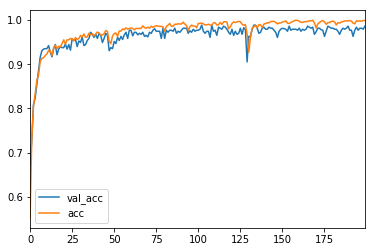

In [ ]:
h['val_acc'].plot(label='val_acc')
h['acc'].plot(label='acc')
plt.legend()
# history.history..val_acc.plot(label='LSTM')
# history.history..acc.plot(label='MLP',linestyle='dashed')


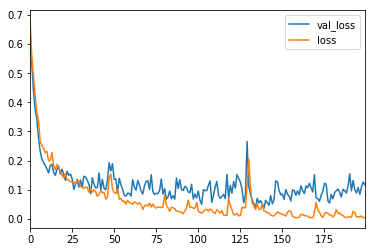

In [ ]:
h['val_loss'].plot(label='val_loss')
h['loss'].plot(label='loss')
plt.legend()

In [ ]:
preds = model.predict(X_test.values.reshape(X_test.shape[0],X_test.shape[1],1))
predss = np.argmax(preds,axis=-1)
print(classification_report(predss,Y_test))
print(accuracy_score(predss,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       208
           1       0.99      0.99      0.99       224

    accuracy                           0.99       432
   macro avg       0.99      0.99      0.99       432
weighted avg       0.99      0.99      0.99       432

0.9861111111111112


In [ ]:
model.evaluate(X_test.values.reshape(X_test.shape[0],X_test.shape[1],1),Y_test_hot)

432/432 [==============================] - 0s 287us/step


[0.11714906862040085, 0.9861111111111112]

# Visualize Results

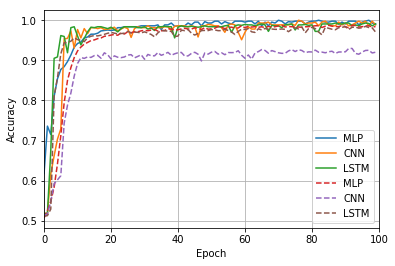

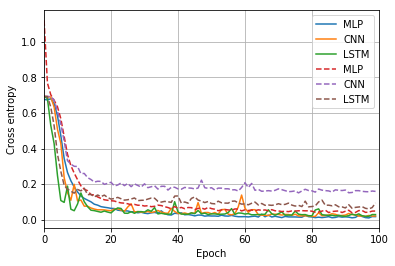

In [ ]:
cnn=pd.read_csv('results/cnn.csv')
lstm=pd.read_csv('results/lstm.csv')
mlp=pd.read_csv('results/mlp_log.csv')

mlp.val_acc.plot(label='MLP')
cnn.val_acc.plot(label='CNN')
lstm.val_acc.plot(label='LSTM')
mlp.acc.plot(label='MLP',linestyle='dashed')
cnn.acc.plot(label='CNN',linestyle='dashed')
lstm.acc.plot(label='LSTM',linestyle='dashed')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.autoscale()
plt.xlim(0,100)
plt.legend()
plt.savefig('acc.eps')
plt.show()

mlp.val_loss.plot(label='MLP')
cnn.val_loss.plot(label='CNN')
lstm.val_loss.plot(label='LSTM')
mlp.loss.plot(label='MLP',linestyle='dashed')
cnn.loss.plot(label='CNN',linestyle='dashed')
lstm.loss.plot(label='LSTM',linestyle='dashed')

plt.xlabel('Epoch')
plt.ylabel('Cross entropy')
plt.grid(True)
plt.autoscale()
plt.xlim(0,100)
plt.legend()
plt.savefig('loss.eps')
plt.show()

In [ ]:
model_mlp = keras.models.load_model('results/mlp.h5')
model_lstm = keras.models.load_model('results/lstm.h5')
model_cnn = keras.models.load_model('results/cnn.h5')

In [ ]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
p=pd.DataFrame(columns=['k','inertia'])
for k in range (1, 21):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans = KMeans(n_clusters=k, random_state=1).fit(x_train)
    # Sum of distances of samples to their closest cluster center
    interia = kmeans.inertia_
    p.loc[k-1]={'k':k,'inertia':interia}
    print("k:",k, " cost:", interia)  

k: 1  cost: 4674.751046567099
k: 2  cost: 2996.413455543434
k: 3  cost: 2562.270347618711
k: 4  cost: 2332.945643240519
k: 5  cost: 2160.086745283267
k: 6  cost: 2025.9856593174989
k: 7  cost: 1918.4577442793086
k: 8  cost: 1831.968689687154
k: 9  cost: 1759.5810081971092
k: 10  cost: 1702.9298944867292
k: 11  cost: 1654.0186354082696
k: 12  cost: 1606.6669304156817
k: 13  cost: 1567.499065264867
k: 14  cost: 1532.814641321707
k: 15  cost: 1502.8331820106039
k: 16  cost: 1476.0541267009464
k: 17  cost: 1449.4473237309826
k: 18  cost: 1426.7842032094932
k: 19  cost: 1403.757859775987
k: 20  cost: 1381.1508210972274


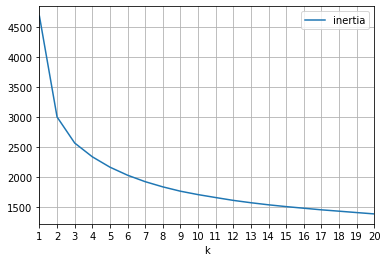

In [ ]:
ax = p.plot('k','inertia')
ax.set_xlim([1,20])
ax.set_xticks(list(range(1,21)))
ax.grid()

In [ ]:
true_k = 2
# Initializing KMeans
kmeans = KMeans(n_clusters=true_k,random_state=1)
# Fitting with inputs
kmeans = kmeans.fit(x_train)
# Predicting the clusters
labels = kmeans.predict(x_test)
# Getting the cluster centers
C = kmeans.cluster_centers_

# 2D PCA only

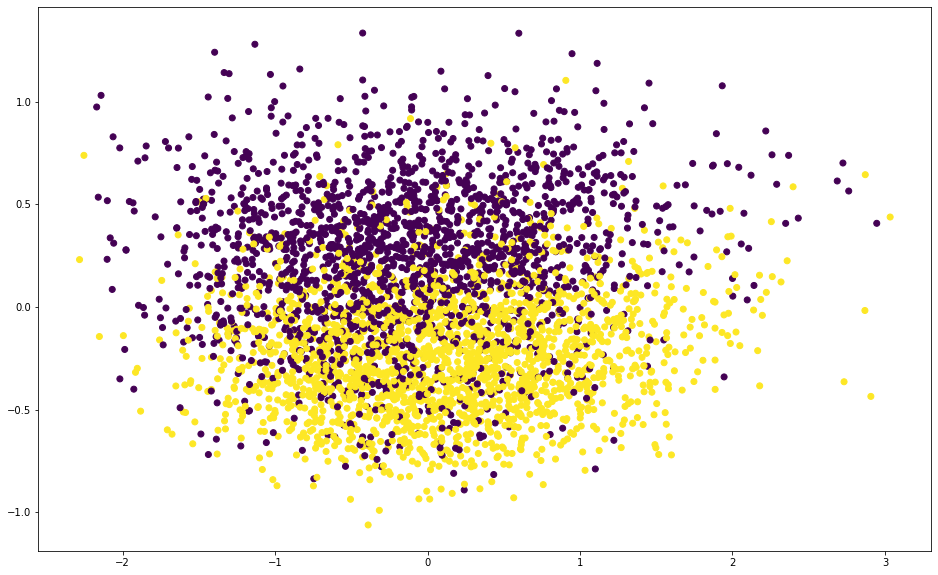

In [ ]:
# 2D
pca = PCA(n_components=2).fit(x_train)
data2D = pca.transform(x_train)
fig = plt.figure(figsize=(16,10))
plt.scatter(data2D[:,0], data2D[:,1], c=y_train)
plt.show()

# 2D PCA with kmeans

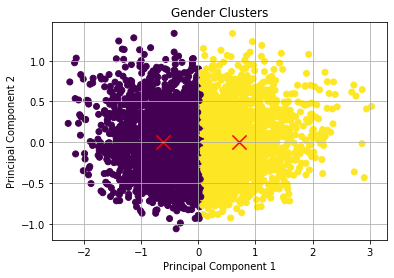

In [ ]:
pca = PCA(n_components=2).fit(x_train)
centers2D = pca.transform(kmeans.cluster_centers_)
data2D = pca.transform(x_train)
fig = plt.figure()
plt.scatter(data2D[:,0], data2D[:,1], c=kmeans.labels_.tolist())
plt.scatter(centers2D[:,0], centers2D[:,1], 
            marker='x', s=200, linewidths=3, c='r')
plt.grid()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Gender Clusters')
plt.savefig('pcameans.eps')
plt.savefig('pcameans.png',dpi=400)
plt.show() 

# What-If tool
https://pair-code.github.io/what-if-tool/

In [ ]:
import tensorflow as tf

columns=temp.columns
# WIT predict functions:
def custom_predict_1(examples_to_infer):
    dff=pd.DataFrame()
    for i in examples_to_infer:
        d=[]
        for col in columns:
            if temp[col].dtype is np.dtype(np.float64):
                d.append(i.features.feature[col].float_list.value[0])
        d = np.array(d)
        
        dff = dff.append(pd.DataFrame(d).T)
    preds = model.predict(np.asarray(dff).reshape(dff.shape[0],dff.shape[1],1))
    return preds

# Converts a dataframe into a list of tf.Example protos.
def df_to_examples(df, columns=None):
    examples = []
    if columns == None:
        columns = df.columns.values.tolist()
    for index, row in df.iterrows():
        example = tf.train.Example()
        for col in columns:
            if df[col].dtype is np.dtype(np.int64):
                example.features.feature[col].int64_list.value.append(int(row[col]))
            elif df[col].dtype is np.dtype(np.float64):
                example.features.feature[col].float_list.value.append(row[col])
            elif row[col] == row[col]:
                example.features.feature[col].bytes_list.value.append(row[col].encode('utf-8'))
        examples.append(example)
    return examples


In [ ]:
temp = X_test.loc[:,:].copy()
temp['label'] = Y_test.tolist()
examples = df_to_examples(temp)

In [ ]:
# try:
#   import google.colab
#   !pip install --upgrade -q witwidget
# except Exception:
#   pass

from witwidget.notebook.visualization import WitWidget, WitConfigBuilder

In [ ]:
#@title Invoke What-If Tool for the data {display-mode: "form"}

num_datapoints = 100  #@param {type: "number"}
tool_height_in_px = 600  #@param {type: "number"}

# Setup the tool with the test examples and the trained classifier
config_builder = WitConfigBuilder(examples).set_custom_predict_fn(custom_predict_1).set_label_vocab(['Female', 'Male'])#.set_compare_custom_predict_fn(custom_predict_2)

WitWidget(config_builder, height=tool_height_in_px)